In [1]:
import sys
import os
import json
import imp
import datetime
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import HTML
sys.path.append('..')
import pyava
#imp.reload(pyava)
# imp.reload(pyava.parameter_scan_lattice)
#imp.reload(pyava.parameter_scan)
import pyava.parameter_scan_lattice as psc
import pyava.ei_perc_lattice as eip
import pyava.visualize as vis
from pyava.graphio import read_lattice


In [10]:
run_func = psc.run_ei_perc_2d
tstep = 200
nb_repeats = 3
par_list = ['p', 'p_exc']
step_size = 0.05
mesh1 = np.arange(0, 1+step_size, step_size)
mesh2 = np.arange(0, 1+step_size, step_size)
print(mesh1)
print(mesh2)
mesh_list = [mesh1, mesh2]
fixed_par = dict(tstep=tstep, nb_repeats=nb_repeats)
out_root_dir = '../results'
fmt='%Y-%m-%d-%H-%M-%S'
timestamp = datetime.datetime.now().strftime(fmt)
outdir = os.path.join(out_root_dir, timestamp)
if not os.path.exists(outdir):
    os.mkdir(outdir)
psc.parameter_scan(par_list, mesh_list, fixed_par, run_func, outdir=outdir, seed=20, parallel=True)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [3]:
out_root_dir = '../results'
#subdir = '2021-07-11-23-17-22_10x10'
subdir = '2021-07-12-00-08-42'
indir = os.path.join(out_root_dir, subdir)
scan_par = psc.load_scan_par(indir)
print(scan_par)

{'par_list': ['p', 'p_exc'], 'mesh_list': [[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0], [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]], 'fixed_par': {'tstep': 200, 'nb_repeats': 30}, 'run_func_name': 'run_ei_perc_2d'}


In [3]:
reach_mat, scan_par = psc.get_scan_prop_mat(indir, psc.get_reach)

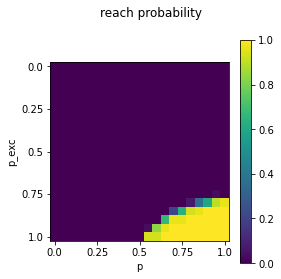

In [5]:
reach_thresh = 120
madeit_mat = reach_mat > reach_thresh
reach_prob_mat = np.sum(madeit_mat, axis=2)/madeit_mat.shape[2]

vis.plot_scan_mat(reach_prob_mat, scan_par, 'reach probability')

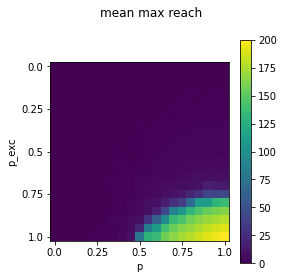

In [6]:
mean_max_reach = np.mean(reach_mat, axis=2)
vis.plot_scan_mat(mean_max_reach, scan_par, 'mean max reach')

In [7]:
cluster_size_mat, scan_par = psc.get_cluster_size_mat(indir)

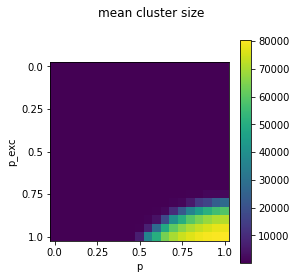

In [8]:
mean_cluster_size = np.mean(cluster_size_mat, axis=2)
vis.plot_scan_mat(mean_cluster_size, scan_par, 'mean cluster size')

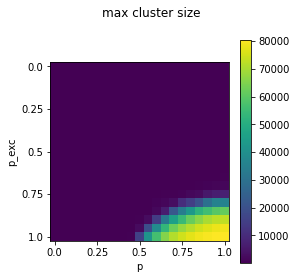

In [9]:
max_cluster_size = np.max(cluster_size_mat, axis=2)
vis.plot_scan_mat(max_cluster_size, scan_par, 'max cluster size')

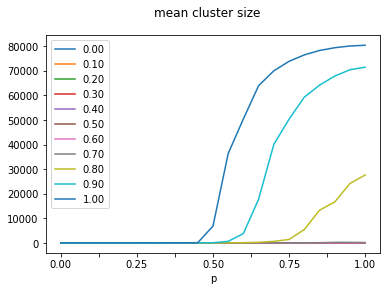

In [11]:
imp.reload(pyava.visualize)
vis.plot_mat_1d(mean_cluster_size, scan_par, 'mean cluster size')

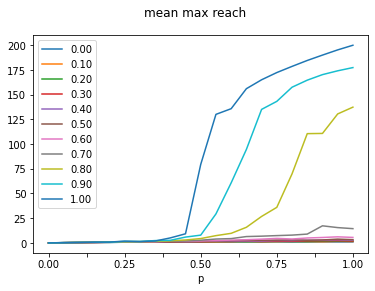

In [13]:
vis.plot_mat_1d(mean_max_reach, scan_par, 'mean max reach')

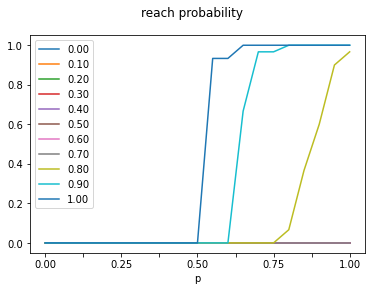

In [14]:
vis.plot_mat_1d(reach_prob_mat, scan_par, 'reach probability')

In [34]:
cluster_size_mat = np.array(cluster_size_mat)

/home/hubo/Software/anaconda3/envs/pyava/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

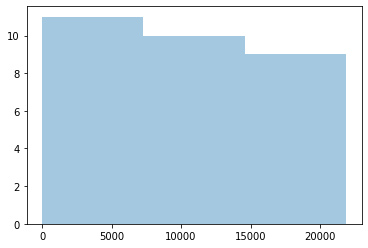

In [25]:
# import seaborn as sns
# sns.distplot(cluster_size_mat[17,14,:], kde=False)

[21  2  2  2  1  1  0  0  0  1]


Text(0, 0.5, 'number of instances')

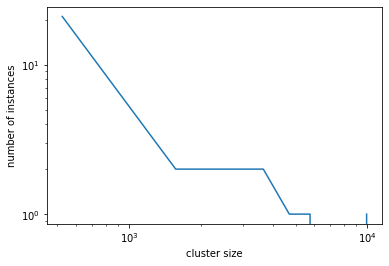

In [35]:
size_list = cluster_size_mat[16, 15, :]
hsize, bin_edges = np.histogram(size_list)
print(hsize)
xx = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(xx, hsize)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('cluster size')
plt.ylabel('number of instances')

[-9.29622796e-01  4.33789590e+03]


Text(0.5, 0.98, 'p: 0.55, p_exc: 0.90')

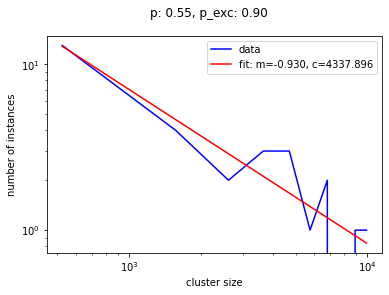

In [62]:
from scipy.optimize import curve_fit
def powerlaw(x, m, c):
    return c * x**m
p_exc = 0.9
p = .55
p_exc_idx = int(p_exc* 20)
pidx = int(p * 20)
para_str = 'p: {:.2f}, p_exc: {:.2f}'.format(p, p_exc)
size_list = cluster_size_mat[p_exc_idx, pidx, :]
hsize, bin_edges = np.histogram(size_list)
xx = (bin_edges[:-1] + bin_edges[1:])/2
xdata = xx
ydata = hsize
popt, pcov = curve_fit(powerlaw, xdata, ydata, p0 = np.asarray([-1,10**4]))
print(popt)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, powerlaw(xdata, *popt), 'r-',

         label='fit: m=%5.3f, c=%5.3f' % tuple(popt))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('cluster size')
plt.ylabel('number of instances')
plt.legend()
plt.suptitle(para_str)

p: 0.8
p_exc: 0.8


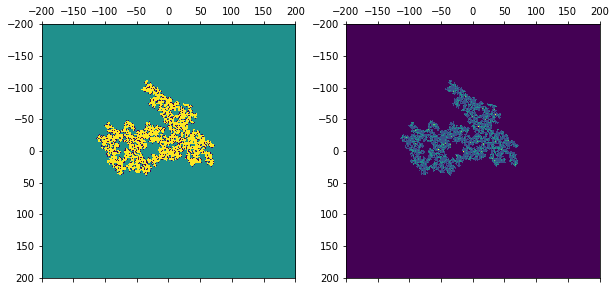

In [32]:

j, k = (16, 16)
par_list = scan_par['par_list']
mesh1 = scan_par['mesh_list'][0]
mesh2 = scan_par['mesh_list'][1]
print('{}: {}'.format(par_list[0], mesh1[j]))
print('{}: {}'.format(par_list[1], mesh2[k]))
subdir = os.path.join(indir, 'j_{:03d}_k_{:03d}'.format(j, k))
repeat_nb = 12

lat = read_lattice(os.path.join(subdir, '{:03d}.pkl'.format(repeat_nb)))

t = 300
fig, axs = plt.subplots(1, 2, figsize=(10,10))
radius = lat.radius
extent = [-radius, radius, radius, -radius]
axs[0].matshow(np.multiply(lat.node_type_mat, lat.act_time_mat<=t), extent=extent)
im1 = axs[1].matshow(np.multiply(lat.node_latent_state_mat, lat.act_time_mat<=t), extent=extent)
# im1 = axs[1].matshow(lat.node_latent_state_mat)
# im1 = axs[1].matshow(lat.act_time_mat<=t)
#fig.colorbar(im1, ax=axs[1])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4

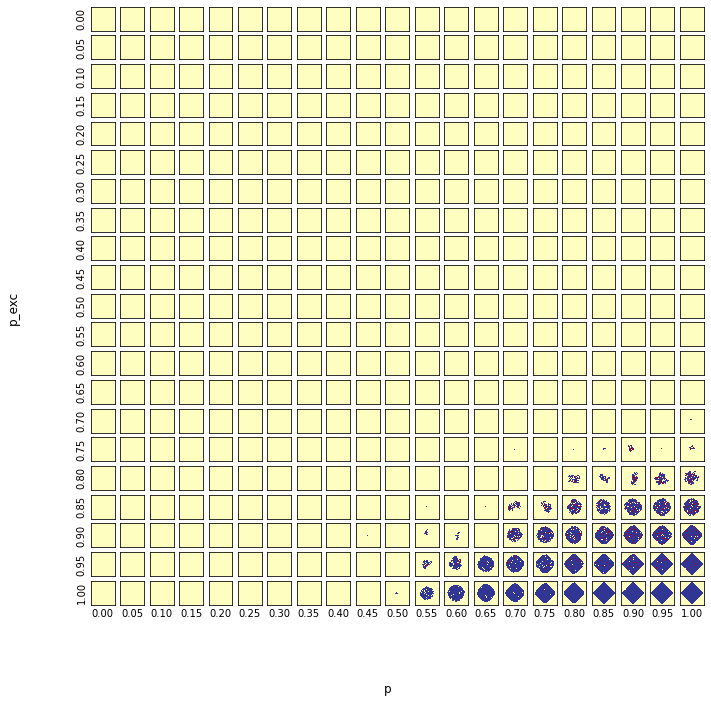

In [62]:
imp.reload(pyava.visualize)
repeat_nb = 21
gstep=[1,1]
# gstep=[10,10]
# grange=[(0.5,1),(0.5,1)]
grange=[(0.,1),(0.,1)]
t_stop=200
fig = vis.plot_cluster_shape_grid(indir, repeat_nb, gstep, grange, t_stop)

In [63]:
fig.savefig('../figures/cluster_shape_rpt{:d}_range{:.1f}to{:.1f}.png'.format(repeat_nb, grange[0][0], grange[0][1]))

In [15]:
scan_par = psc.load_scan_par(indir)

21

In [37]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [39]:
lat.act_time_mat[lat.act_time_mat<1e308].max().astype('int')
#dir(lat)

200

p: 1.0
p_exc: 0.8500000000000001


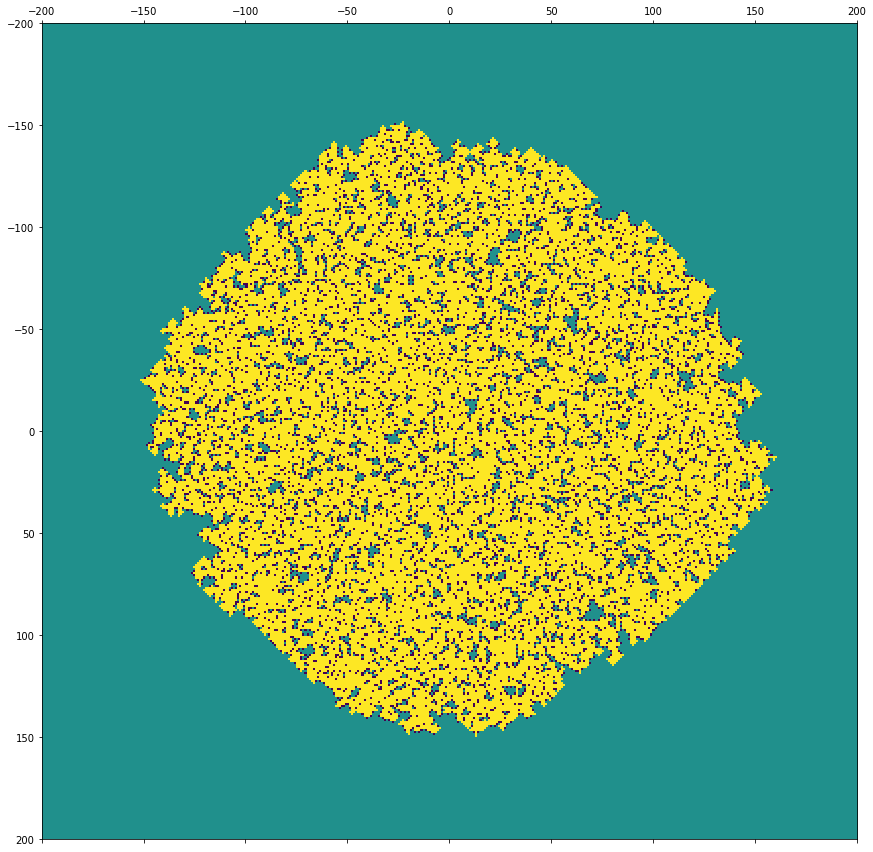

In [42]:
j, k = (20, 17)
par_list = scan_par['par_list']
mesh1 = scan_par['mesh_list'][0]
mesh2 = scan_par['mesh_list'][1]
print('{}: {}'.format(par_list[0], mesh1[j]))
print('{}: {}'.format(par_list[1], mesh2[k]))
subdir = os.path.join(indir, 'j_{:03d}_k_{:03d}'.format(j, k))
repeat_nb = 13

lat = read_lattice(os.path.join(subdir, '{:03d}.pkl'.format(repeat_nb)))

t =300
fig, axs = plt.subplots(figsize=(15,15))
radius = lat.radius
extent = [-radius, radius, radius, -radius]
axs.matshow(np.multiply(lat.node_type_mat, lat.act_time_mat<=t), extent=extent)

In [38]:
# j, k = (16, 16)
# j, k = (19, 19)
j, k = (20, 15)
par_list = scan_par['par_list']
mesh1 = scan_par['mesh_list'][0]
mesh2 = scan_par['mesh_list'][1]
print('{}: {}'.format(par_list[0], mesh1[j]))
print('{}: {}'.format(par_list[1], mesh2[k]))
subdir = os.path.join(indir, 'j_{:03d}_k_{:03d}'.format(j, k))
repeat_nb = 13

lat = read_lattice(os.path.join(subdir, '{:03d}.pkl'.format(repeat_nb)))
imp.reload(pyava.visualize)
movie = vis.activation_movie(lat, tmax=300)
ani = vis.show_movie(movie)
HTML(ani.to_html5_video())

p: 1.0
p_exc: 0.75
